In [1]:
from MeronAlgorithmImprovedEstimators import MeronAlgorithmImprovedEstimators
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
mc_steps = 100000  # number of mc steps
n = 8  # number of lattice points
U = 2

t = U / 2

average = {}
error = {}
exact = {}
N_values = [20, 200]
beta_values = [0.1, 1, 10, 100]

for N in N_values:
    for beta in beta_values:
        eps = 2 * beta / N
        if eps > 0.15:
            continue

        w_a = np.exp(- eps * U / 4)
        w_b = np.exp(eps * U / 4) * np.sinh(eps * t)

        data = pd.read_csv(f'correlation_function_U={U}_t={t}_beta={beta}_L={n}_T={N}_mcsteps={mc_steps}.csv')
        exact_data = pd.read_csv('exact_diagonalisation_results.csv', sep='\t')
        plt.plot(range(n), exact_data.loc[:, f'beta={"{:.1f}".format(beta)}'], 'r.')
        plt.errorbar(data.loc[:, 'site'], data.loc[:, 'average'], yerr=data.loc[:, 'error'], fmt='x', capsize=3,
                     markersize=5,
                     markerfacecolor='none')
        plt.title(f'correlation_function_U={U}_t={t}_beta={beta}_L={n}_T={N}_mcsteps={mc_steps}.csv')
        plt.xlabel('distance')
        plt.ylabel('correlation')
        plt.show()

        if beta not in average:
            average[beta] = {}
            exact[beta] = {}
            error[beta] = {}

        average[beta][N] = np.array(data.loc[:, 'average'])
        exact[beta][N] = np.array(exact_data.loc[:, f'beta={"{:.1f}".format(beta)}'])
        error[beta][N] = np.array(data.loc[:, 'error'])




KeyboardInterrupt: 

In [19]:
difference = {}
for N in N_values:
    for beta in beta_values:
        eps = 2 * beta / N
        if eps > 0.15:
            continue
        if beta not in difference:
            difference[beta] = {}
        difference[beta][N] = np.abs(average[beta][N] - exact[beta][N])
        with np.errstate(divide='ignore'):
            significance = difference[beta][N] / error[beta][N]
        if np.max(significance[np.logical_and(np.logical_not(np.isinf(significance)),
                                              np.logical_not(np.isnan(significance)))]) >= 4:
            print('large error encountered')
            print(significance)

/var/folders/s8/rwbyl_wd7c13v2ndk0lsrf2c0000gn/T/ipykernel_22216/2507020049.py:11: RuntimeWarning: invalid value encountered in divide
  significance = difference[beta][N] / error[beta][N]


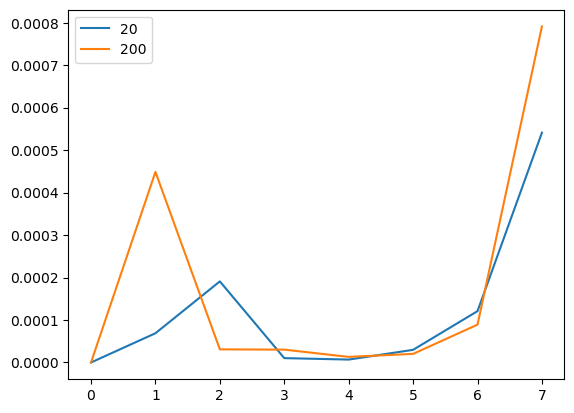

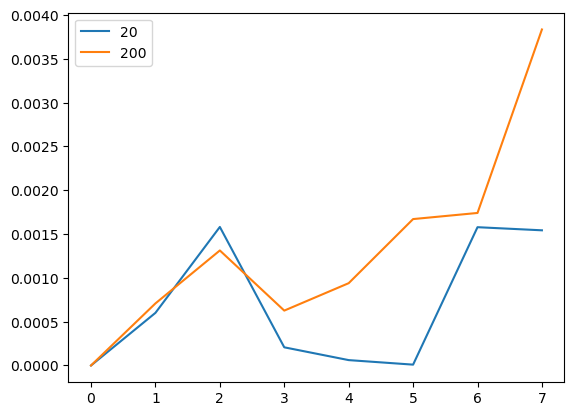

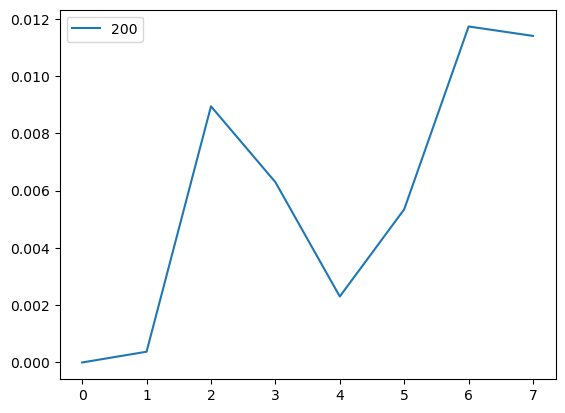

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


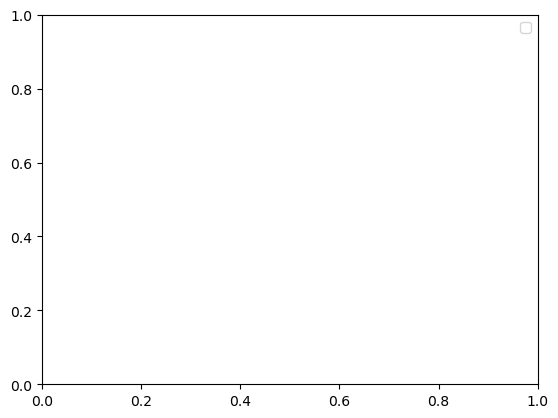

In [23]:
for beta in beta_values:
    for N in N_values:
        eps = 2 * beta / N
        if eps > 0.15:
            continue
        plt.plot(difference[beta][N], label=f'{N}')
    plt.legend()
    plt.show()

In [43]:
# reference config only included once
gauss_configs = []
field_configs = []
for config_nr in range(2 ** 8):
    config = format(config_nr, '08b')
    field_0_start = 0
    field_0_start_legal = True
    field_0_start_string = ''
    field_1_start = 1
    field_1_start_legal = True
    field_1_start_string = ''
    for fermion in range(len(config)):
        if fermion % 2 == 0 and config[fermion] == '0':
            field_1_start -= 1
            field_0_start -= 1
        if fermion % 2 == 1 and config[fermion] == '1':
            field_1_start += 1
            field_0_start += 1
        field_0_start_string += str(field_0_start)
        field_1_start_string += str(field_1_start)
        if field_1_start > 1 or field_1_start < 0:
            field_1_start_legal = False
        if field_0_start > 1 or field_0_start < 0:
            field_0_start_legal = False
    if field_1_start != 1:
        field_1_start_legal = False
    if field_0_start != 0:
        field_0_start_legal = False
    if field_0_start_legal:
        gauss_configs.append(config)
        field_configs.append(field_0_start_string)
    if field_1_start_legal:
        gauss_configs.append(config)
        field_configs.append(field_1_start_string)

print(gauss_configs)
print(field_configs)

['00101011', '00101101', '00101110', '00110011', '00110101', '00110110', '00111001', '00111010', '01001011', '01001101', '01001110', '01010011', '01010101', '01010110', '01011001', '01011010', '01100011', '01100101', '01100110', '01101001', '01101010', '10001011', '10001101', '10001110', '10010011', '10010101', '10010110', '10011001', '10011010', '10100011', '10100101', '10100110', '10101001', '10101010', '10101010', '10101100', '10110010', '10110100', '10111000', '11001010', '11001100', '11010010', '11010100', '11011000', '11100010', '11100100', '11101000']
['00000001', '00000101', '00000111', '00010001', '00010101', '00010111', '00011101', '00011111', '01000001', '01000101', '01000111', '01010001', '01010101', '01010111', '01011101', '01011111', '01110001', '01110101', '01110111', '01111101', '01111111', '11000001', '11000101', '11000111', '11010001', '11010101', '11010111', '11011101', '11011111', '11110001', '11110101', '11110111', '11111101', '00000000', '11111111', '00000100', '0

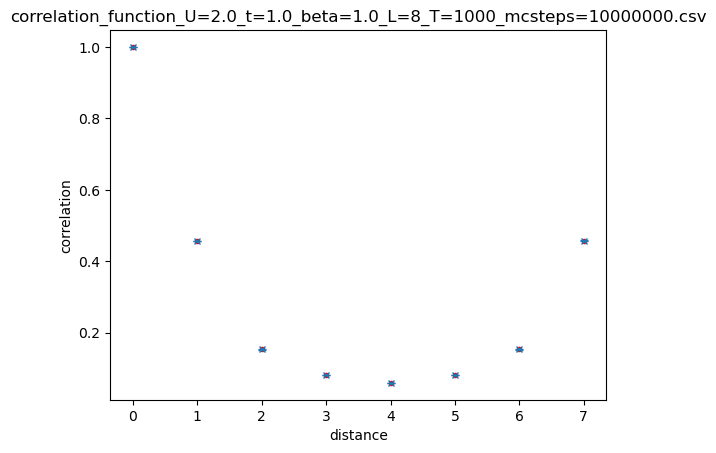

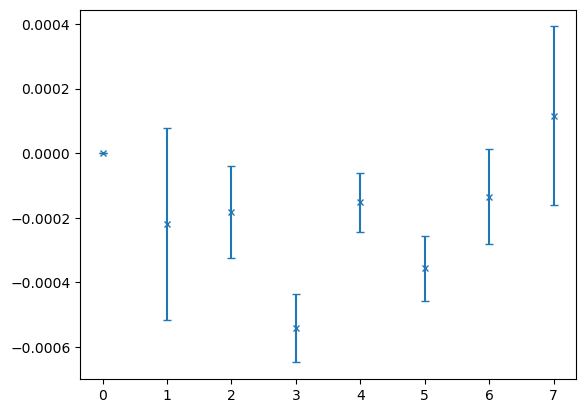

In [54]:
U = 2.0
t = 1.0
beta = 1.0
n = 8
N = 1000
mc_steps = 10000000
data = pd.read_csv(f'Data/Data/correlation_function_U={U}_t={t}_beta={beta}_L={n}_T={N}_mcsteps={mc_steps}_result.csv')
exact_data = pd.read_csv('Data/exact_diagonalisation_results.csv', sep='\t')
plt.plot(range(n), exact_data.loc[:, f'beta={"{:.1f}".format(beta)}'], 'r.')
plt.errorbar(range(n), data['average'], yerr=data.loc[:, 'error'], fmt='x', capsize=3,
             markersize=5,
             markerfacecolor='none')
plt.title(f'correlation_function_U={U}_t={t}_beta={beta}_L={n}_T={N}_mcsteps={mc_steps}.csv')
plt.xlabel('distance')
plt.ylabel('correlation')
plt.show()

difference = data['average'] - exact_data[f'beta={"{:.1f}".format(beta)}']
plt.errorbar(range(n), difference, yerr=data.loc[:, 'error'], fmt='x', capsize=3,
             markersize=5,
             markerfacecolor='none')
plt.show()